In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\vishn\scikit_learn_data


In [6]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
oli['data'].shape
# 400 rows and 4096 columns, i.e., images pixel converted to columns

(400, 4096)

In [9]:
oli['images'].shape
# There are 400 images, with 64 * 64 pixel size

(400, 64, 64)

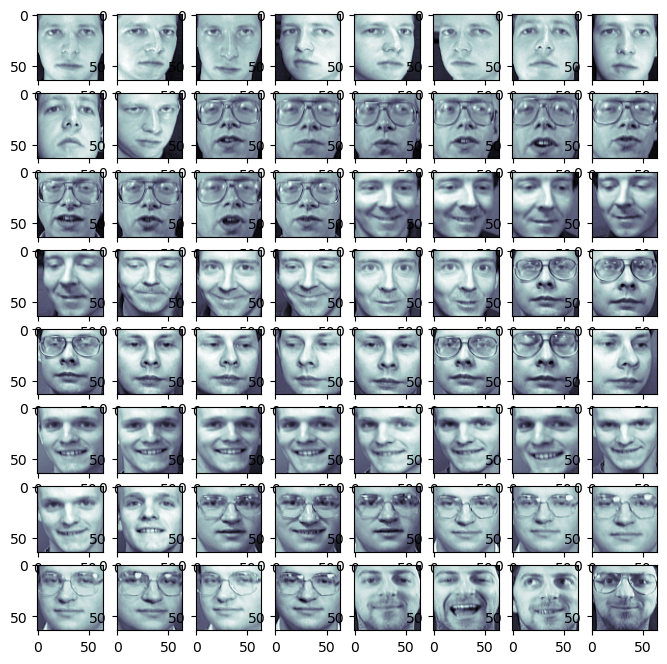

In [11]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    # image plotting function
    ax.imshow(oli.images[i], cmap = plt.cm.bone)

plt.show()

In [12]:
# Input and output data splitting
x = oli.data
y = oli.target

In [13]:
# Applying pca
pca = PCA()
pca.fit(x)

PCA()

In [15]:
pca.components_.shape
# It will have 400 components with each one of length 4096. By default n_components = minimum (400, 4096) => 400

(400, 4096)

In [17]:
# Finding optimal k value
k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k += 1

k

123

In [20]:
# Applying pca with k
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(x)

transformed_data.shape

(400, 123)

Reproducing the images back

In [21]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [22]:
# For plotting it, we reshape it to 64 * 64 pixel form
x_approx_images = x_approx.reshape((400, 64, 64))

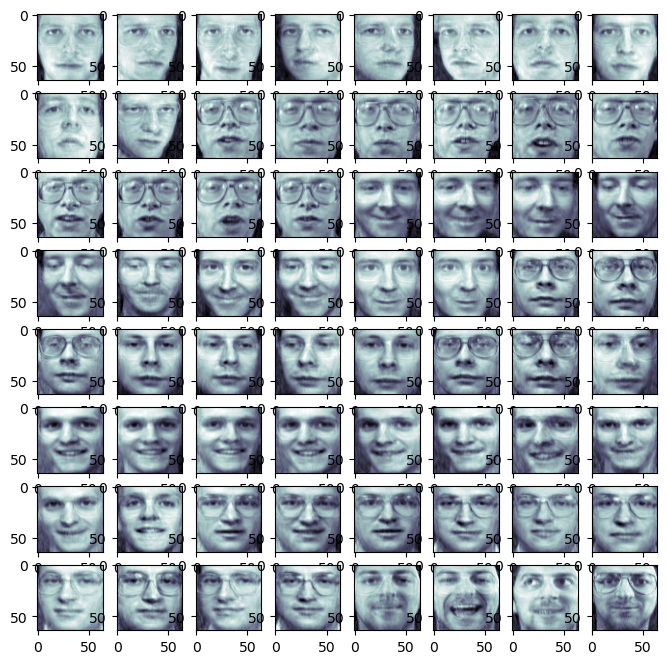

In [24]:
# Plotting the images
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    # image plotting function
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)

plt.show()

In [25]:
eigen_vec = pca.components_
eigen_vec.shape

(123, 4096)

In [26]:
eigen_faces = eigen_vec.reshape((123, 64, 64))

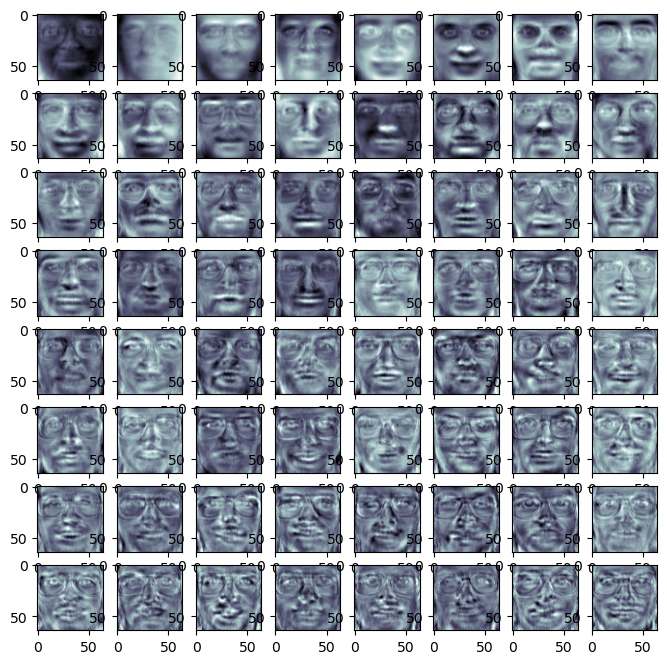

In [27]:
# Plotting the images
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    # image plotting function
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)

plt.show()